In [1]:
#import libraries

#basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

#stats
import math, time, random, datetime

#visualizing missing values
import missingno as msno

#processing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#spliting and testing data
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn import metrics, model_selection, tree, preprocessing, linear_model
from sklearn.metrics import accuracy_score

#machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#colors to be used
PURPLE = '\033[95m'
CYAN = '\033[96m'
DARKCYAN = '\033[36m'
BLUE = '\033[94m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
RED = '\033[91m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

# Get data and see types and missing values
- We see that total_bedrooms has some missing values

In [2]:
df = pd.read_csv("data/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

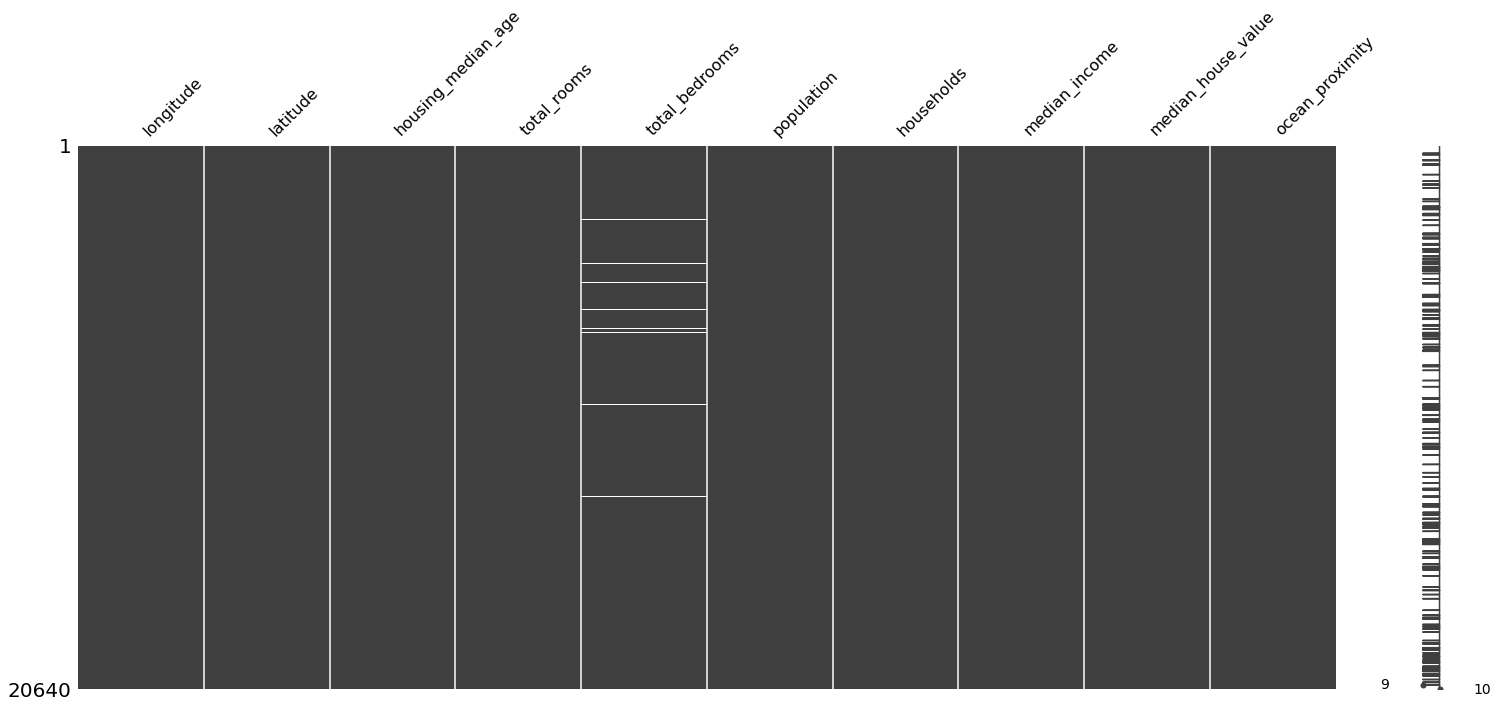

In [4]:
#visualize missing values
msno.matrix(df)

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# See distribution of values: numerical

- There's a weird peak on the end of housing_median_age and median_house_values

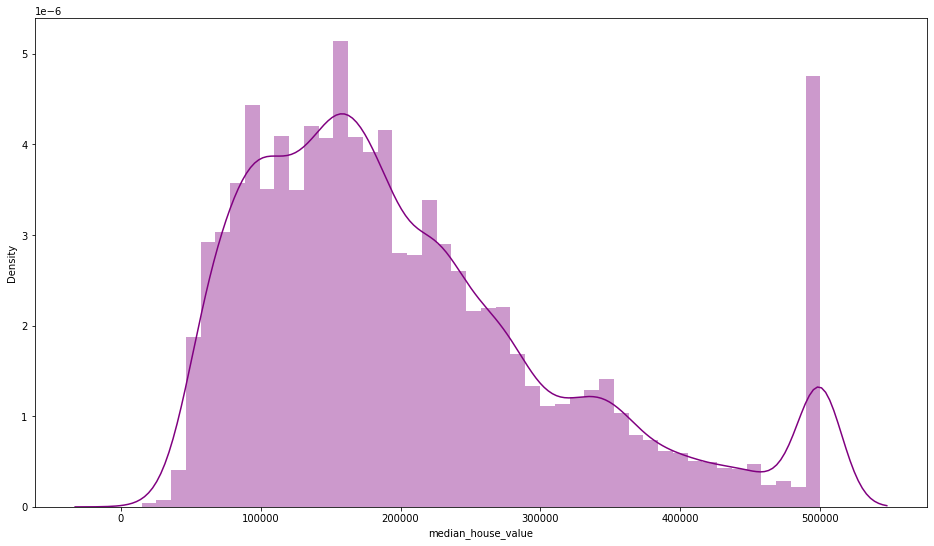

In [6]:
#the one we want to predict: median_house_value
plt.figure(figsize=(16,9))
sns.distplot(df['median_house_value'],color='purple')
plt.show()

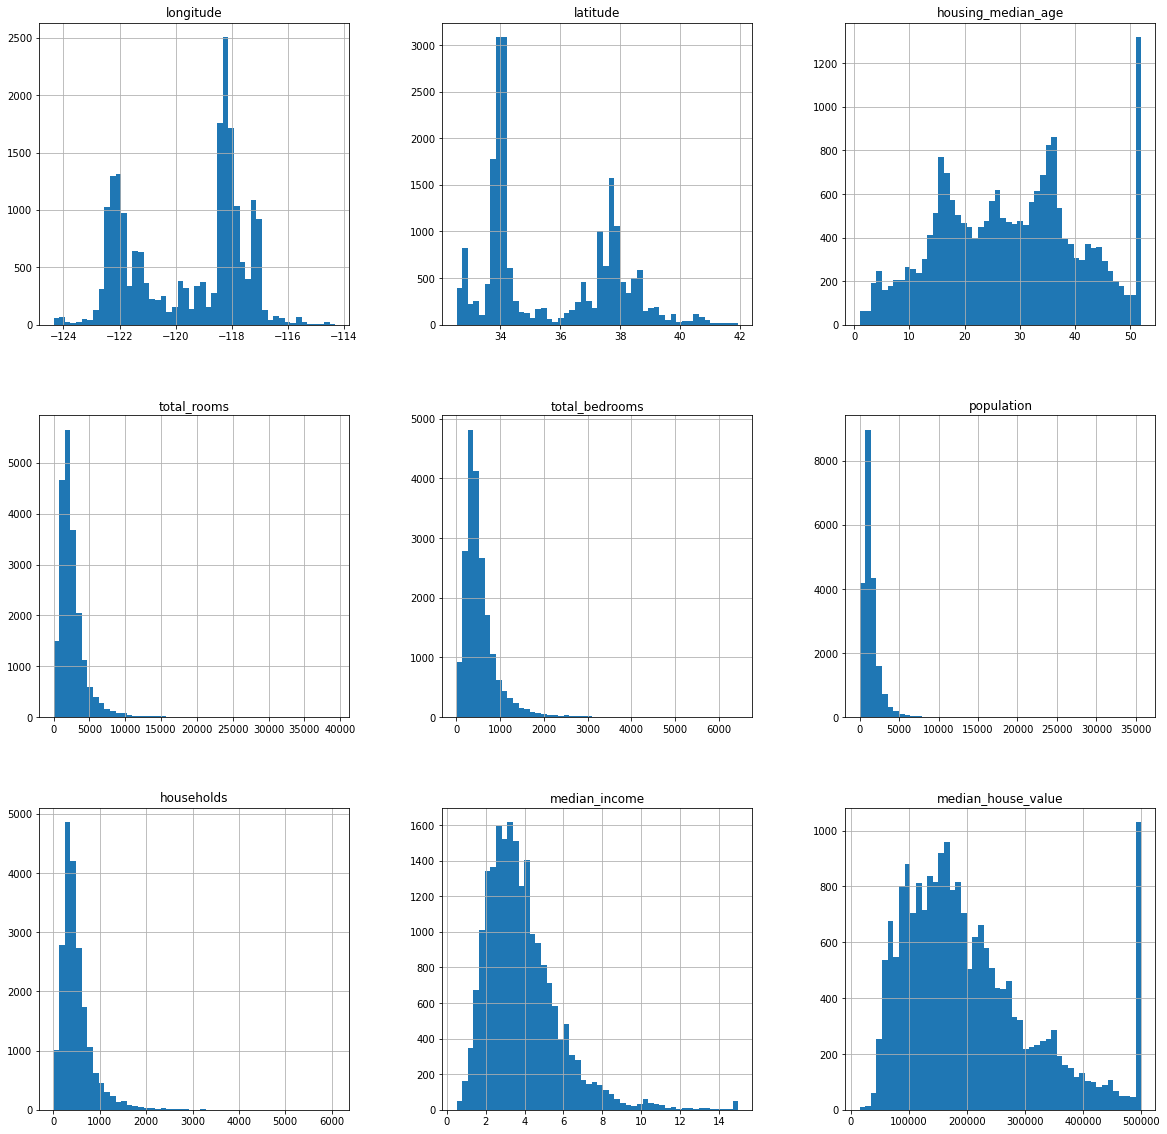

In [7]:
#histograms of columns for numerical
df.hist(bins=50,figsize=(20,20))
plt.show()

# See distribution of values: categorical

- There are too few ISLAND items
- Houses INLAND seem to be cheaper than the rest

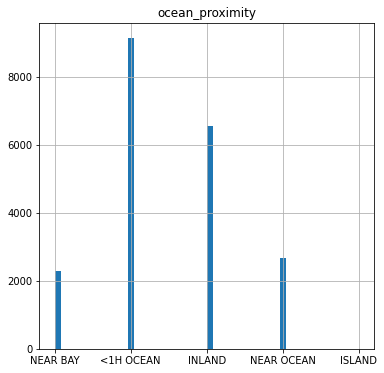

In [8]:
#histogram of columns for ocean_proximity
df['ocean_proximity'].hist(bins=50,figsize=(6,6))
plt.title('ocean_proximity')
plt.show()

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

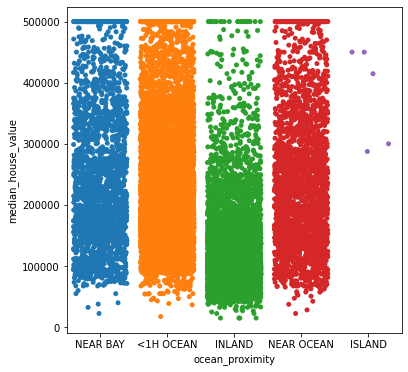

In [9]:
#ocean_proximity by median_house_value
plt.figure(figsize=(6,6))
sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.4)

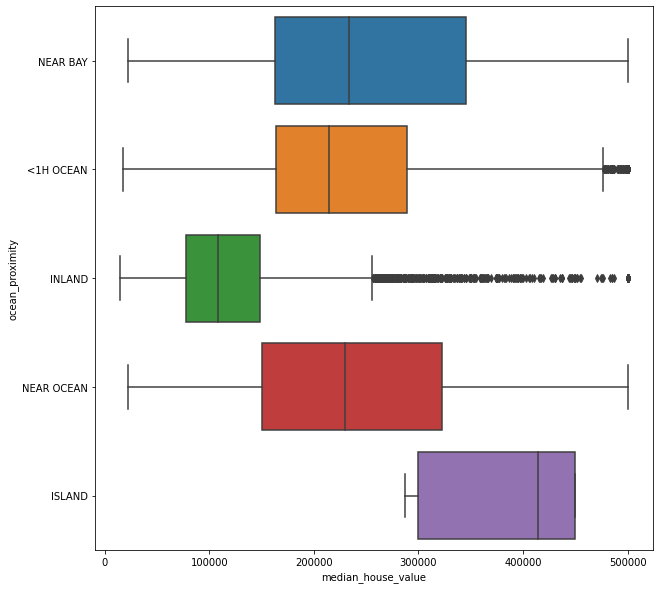

In [10]:
#boxplot graphics (shows outliers)
plt.figure(figsize=(10,10))
sns.boxplot(x='median_house_value',y='ocean_proximity',data=df)
plt.show()

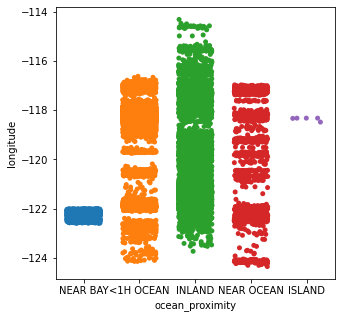

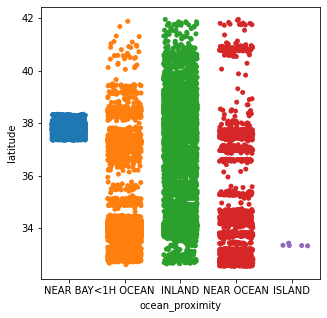

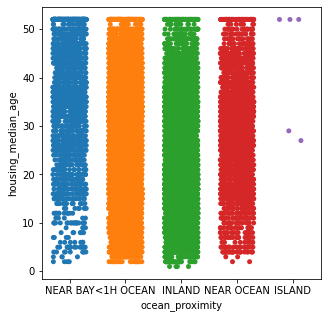

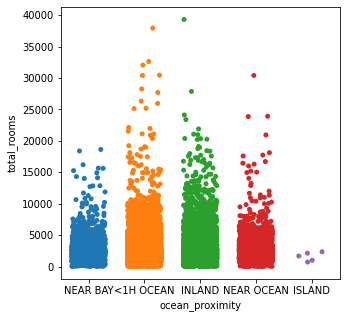

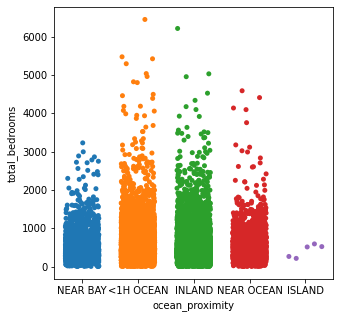

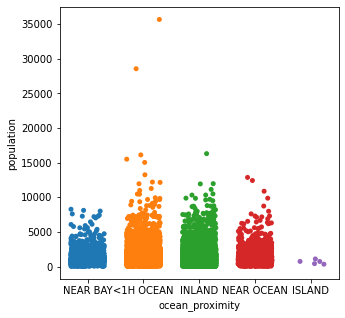

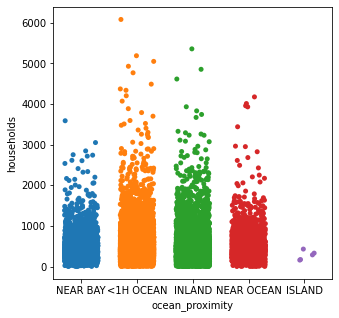

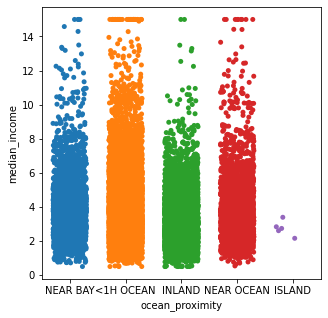

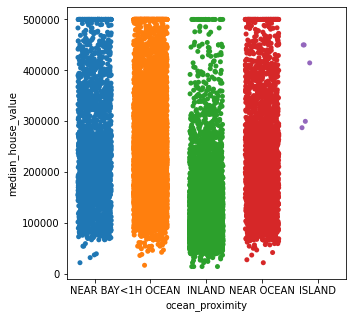

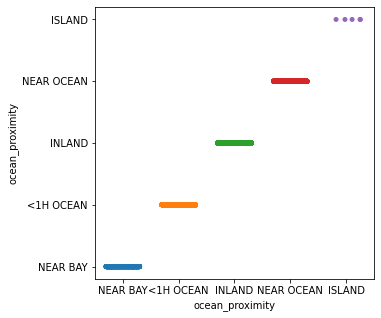

In [11]:
#ocean proximity by every column
for column in df.columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(data=df,x='ocean_proximity',y=column,jitter=0.3)
    plt.show()

In [12]:
#one hot encoding for better visualization
one_hot = pd.get_dummies(df.ocean_proximity)
df = df.drop('ocean_proximity',axis=1)
df = df.join(one_hot)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


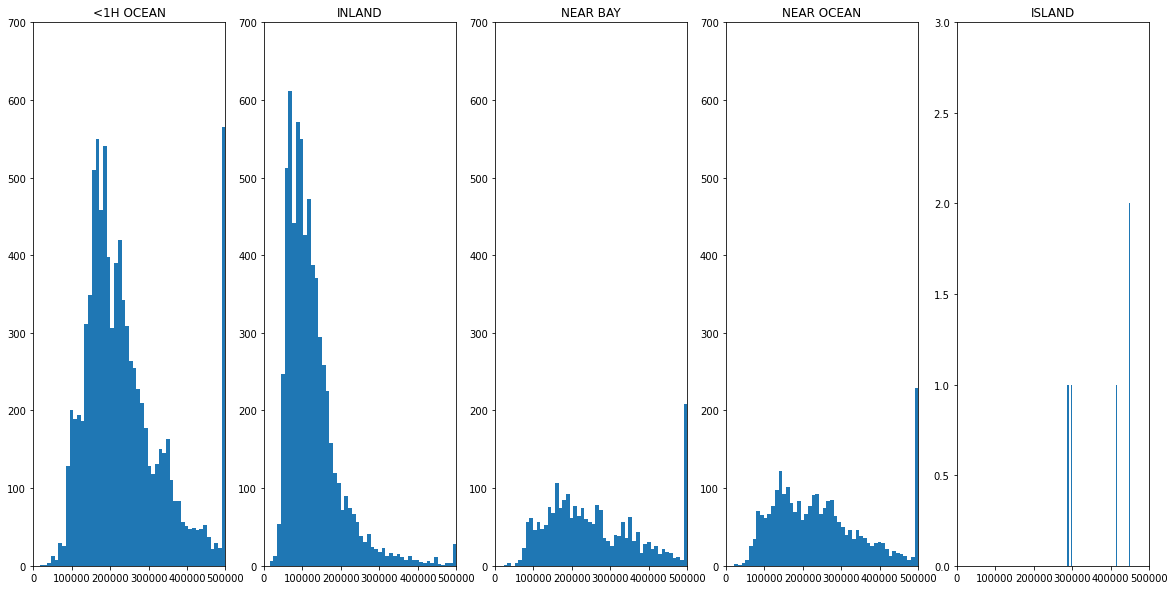

In [13]:
#see median_house_value distribution by location
fig, ax = plt.subplots(1,5,figsize=(20,10))
i=0
for loc in ['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']:
    ax[i].hist(df[df[loc]==1.0]['median_house_value'],bins=50,alpha=1)
    ax[i].set_title(loc)
    ax[i].set_xlim([0,500000])
    ax[i].set_ylim([0,700])
    if i==4:
        ax[i].set_ylim([0,3])
    i+=1
plt.show()

# See relation between columns and correlation matrix: ocean_prox divided

- total_bedrooms is extremely correlated positively with households (0.98)
- total_rooms, total_bedrooms, population and households are very correlated + with each other and housing_median_age has some - correlation with them
- maybe it'd be a good idea to delete total_bedrooms then
- median_income is the only one very correlated (+) with median_house_value
- Proximity to the ocean/bay is related to median_house_price, as expected. Note that, as seen before, categoricals are imbalanced
- obs: Pearson correlation is default

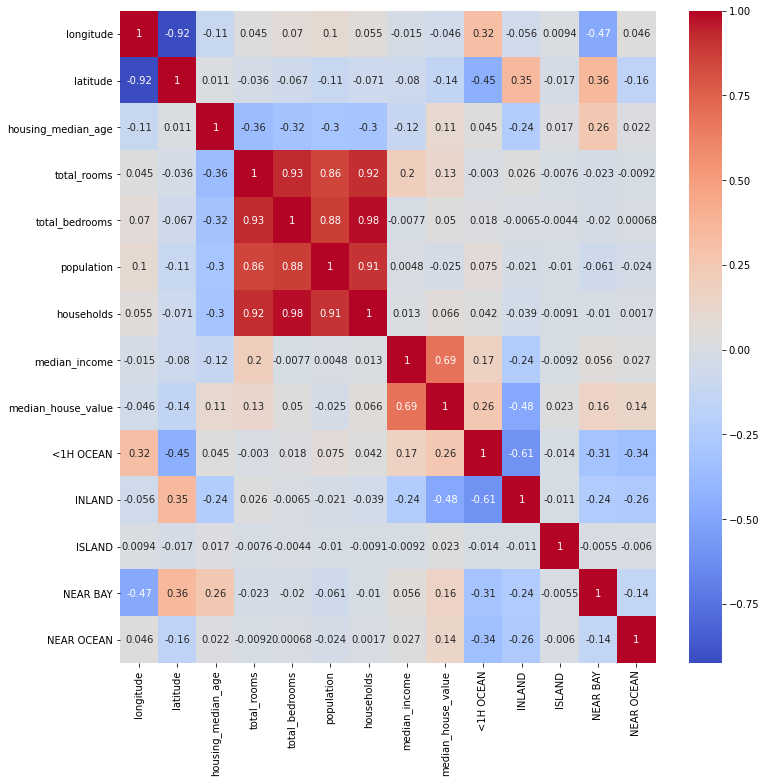

In [14]:
#pearson correlation matrix
from scipy import stats
df_corr = df.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.show()

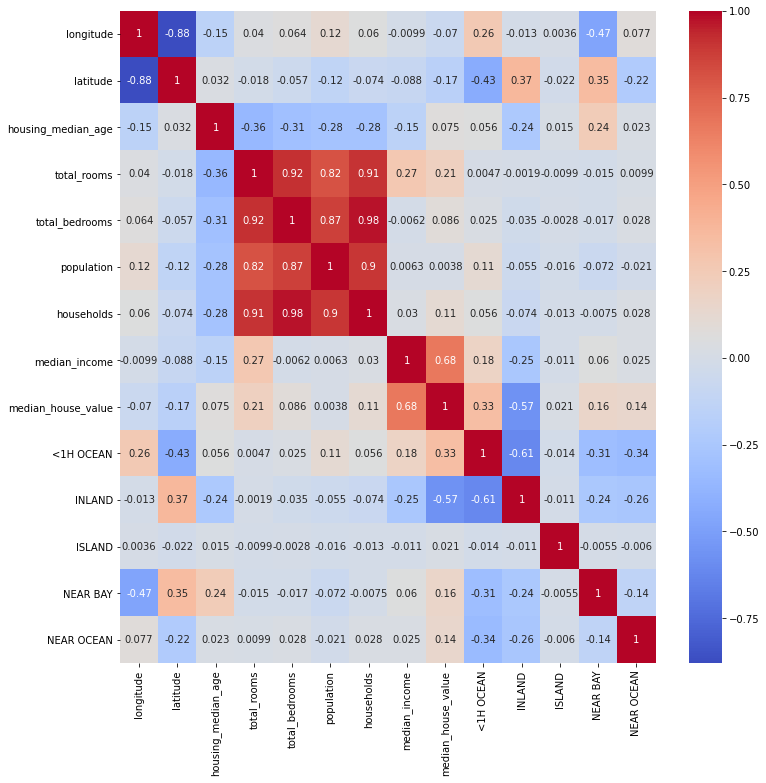

In [16]:
#spearman correlation matrix
df_corr = df.corr(method='spearman')
plt.figure(figsize=(12,12))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

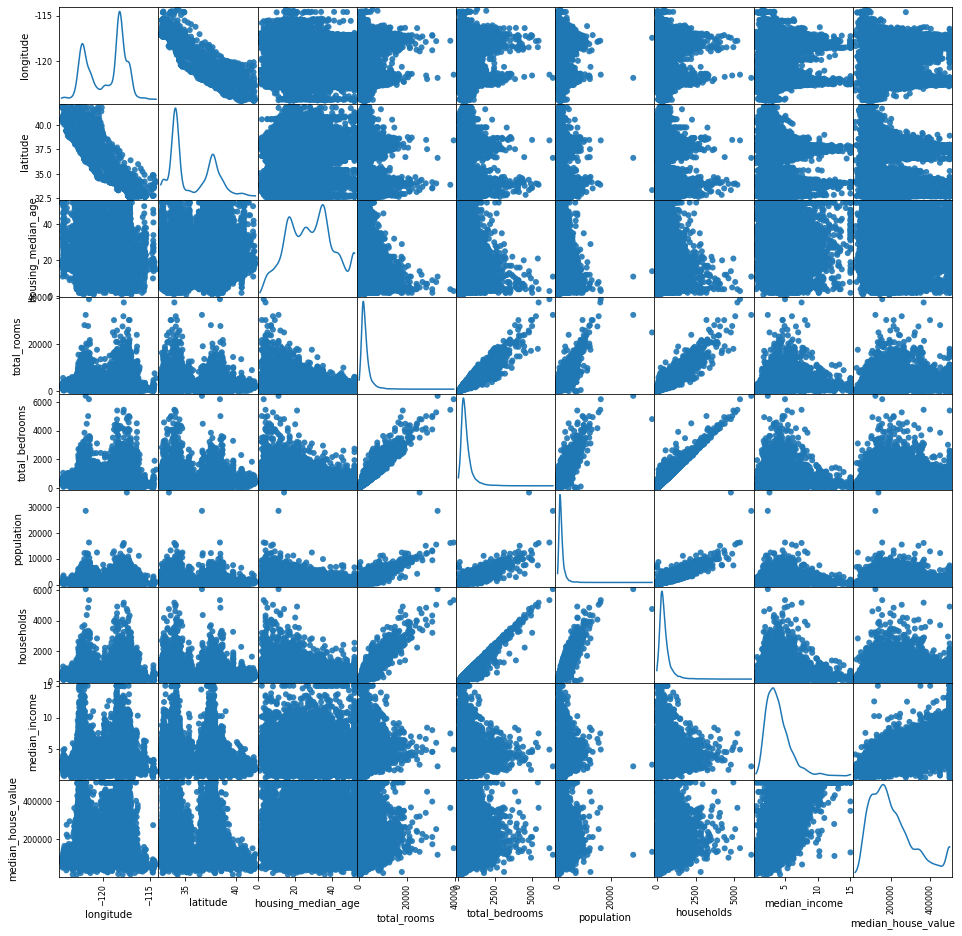

In [17]:
fig = plt.figure()
pd.plotting.scatter_matrix(df[df.columns[:9]],figsize =(16,16),alpha=0.9,diagonal="kde",marker="o")
plt.show()

# See relation between columns and correlation matrix: ocean_prox joined

- Proximity to the ocean/bay is correlated + to median_house_value and median_house_age

In [18]:
#we see a pattern on median_house_value distribution by location
#we join this 5 categories in a new NEAR WATER category

def f(row):
    if row['<1H OCEAN']==0 and row['INLAND']==0:
        return 1
    else:
        return 0
df['near_water'] = df.apply(f,axis=1)
df = df.drop(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],axis=1)

In [19]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,near_water
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0


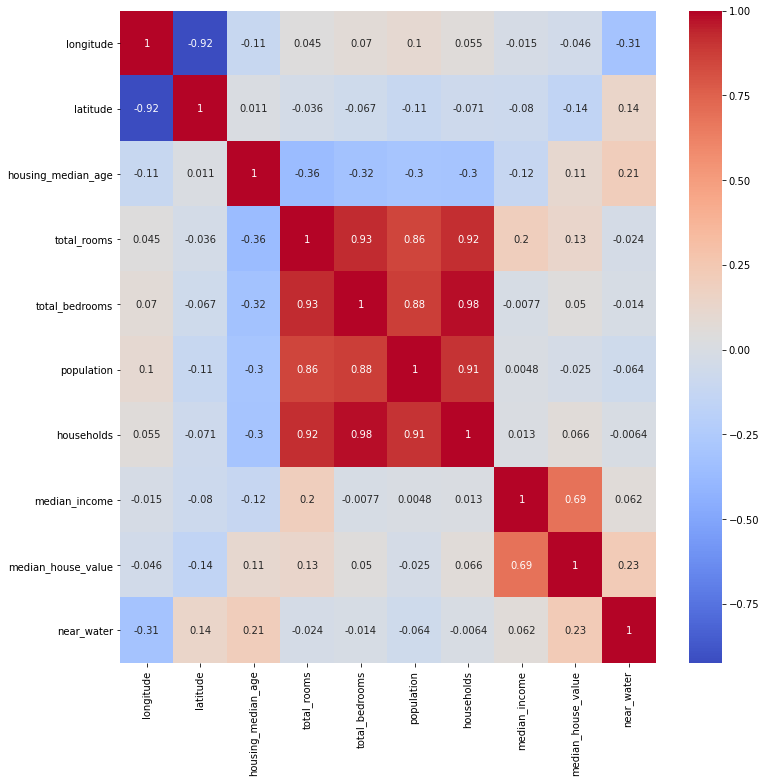

In [20]:
#correlation matrix
df_corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
plt.show()

# Analysis fo features that seem more important
- The only feature where we can see a direct relation is median_income and median_house_value
- But, if we look at the distribution of the values of each column, we can see more relationships

In [21]:
#sorted correlation values
df_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
near_water            0.229994
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

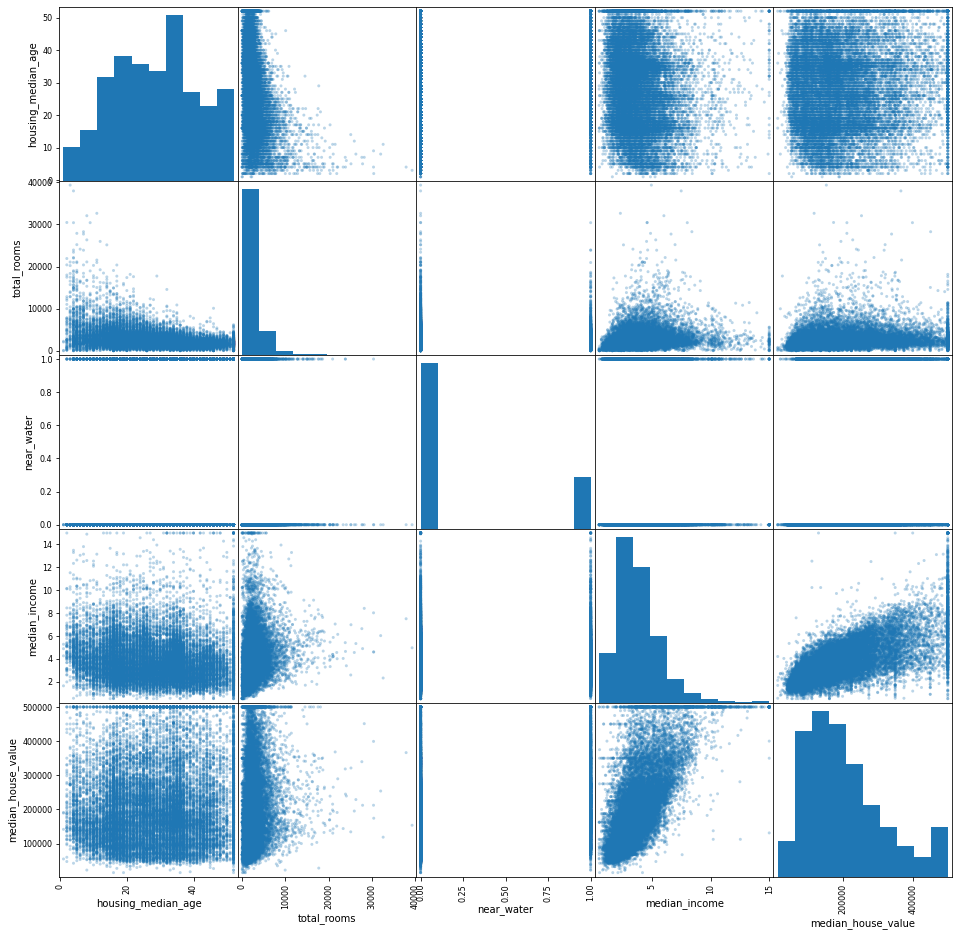

In [22]:
#histogram of columns that seem more important
atributes= [ 'housing_median_age', 'total_rooms','near_water','median_income','median_house_value']
matr = pd.plotting.scatter_matrix(df[atributes],figsize=(16,16),alpha=0.3)    

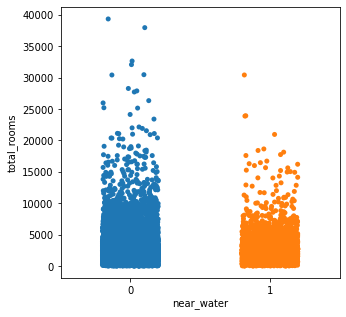

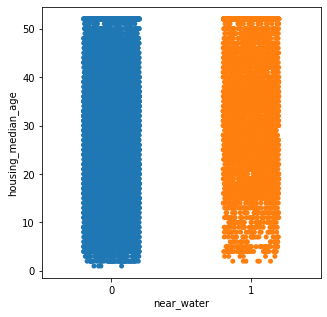

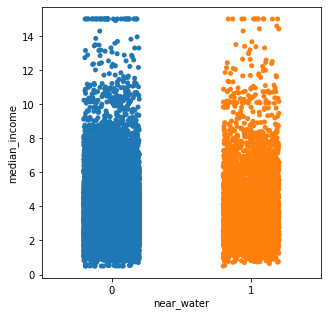

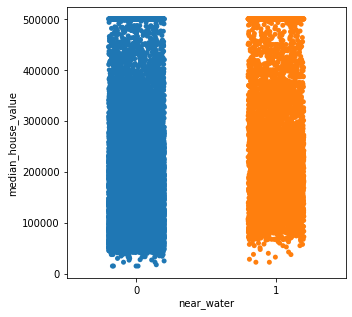

In [23]:
#relation with ocean_proximity
atributes= ['total_rooms','housing_median_age','median_income','median_house_value']
for atribute in atributes:
    plt.figure(figsize=(5,5))
    sns.stripplot(data=df,x='near_water',y=atribute,jitter=0.2)
    plt.show()

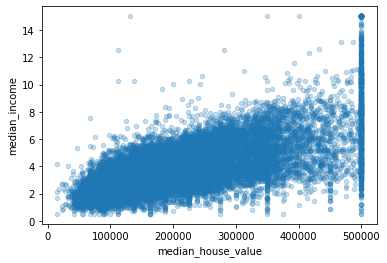

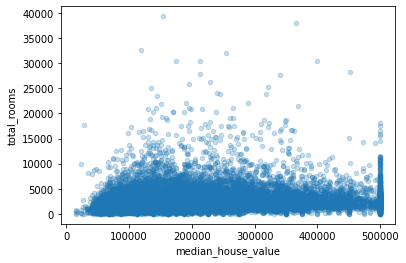

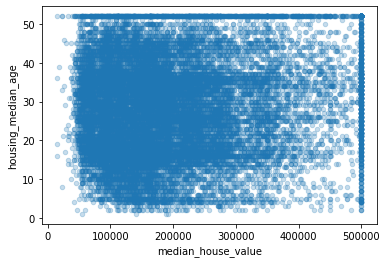

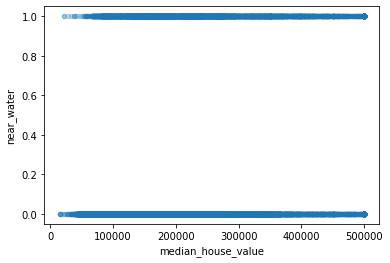

In [24]:
#relation with median_house_value
atributes= ['median_income','total_rooms','housing_median_age','near_water']
for atribute in atributes:
    df.plot(kind='scatter',x='median_house_value',y=atribute,alpha=0.25)

# Location: latitude and longitude
- Looks like the map of california
- There are clearly more expensive houses close to the ocean
- Can't think of a way to improve or make a better analysis of the meaning of locations, maybe the ML algorithm deal with it
- There's no trivial meaning of having high/small latitude and longitude, but they may help the algorithm considering that some regions are clearly more expensive, but it's not a linear relationship, it would be a more complicated function

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

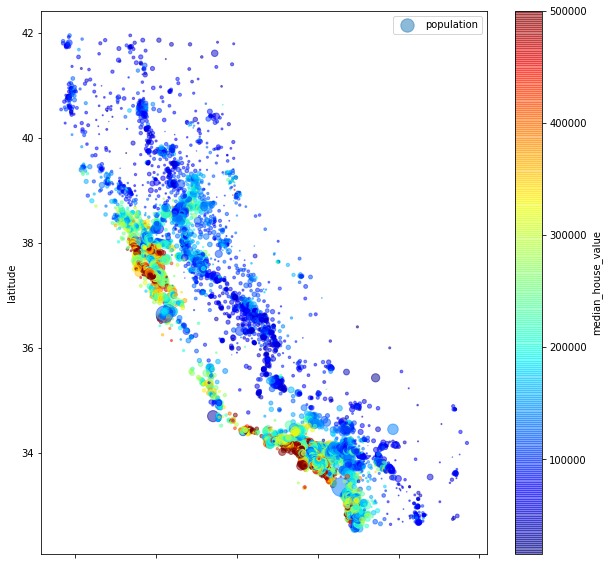

In [25]:
#visualizing geographical data with radius of circle s proportional to population and color c represents price
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,figsize=(10,10),
             s=df['population']/100,label='population',
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)